working dir set to /Users/tree/Projects/food-spoilage-poc
   mq1  tgs1    day  session  label
0  160   411  19747        1      1
1  164   411  19747        1      1
2  165   411  19747        1      1
3  164   413  19747        1      1
4  160   414  19747        1      1


/Users/tree/Projects/food-spoilage-poc/src/pipelines/build_dataset.py:20: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  X["day"] = pd.to_datetime(X["day"]).view("int64") // 86_400_000_000_000  # days since epoch


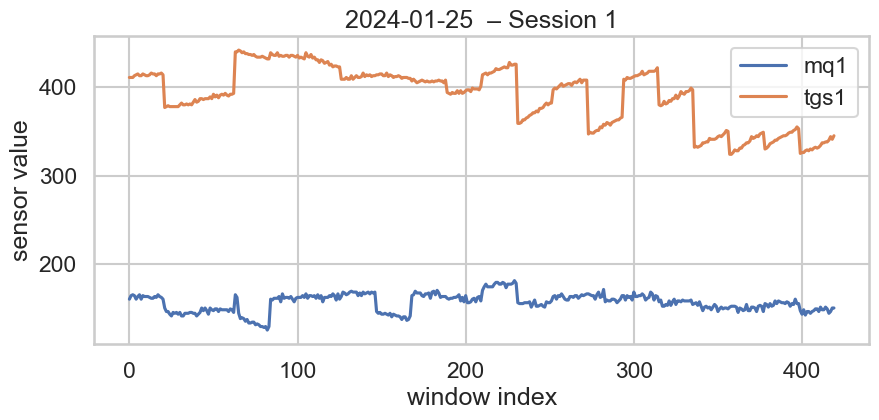

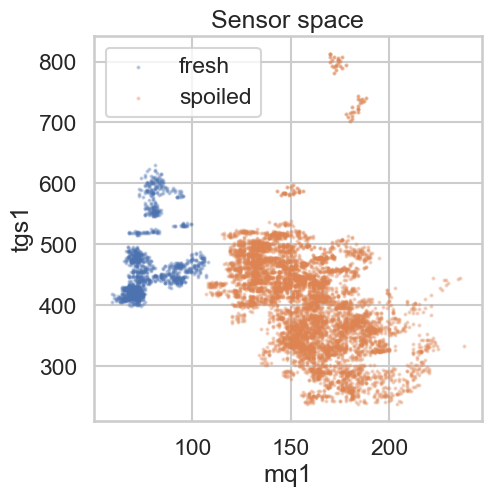

In [2]:
# Cell 1 – imports & load train/test splits
import pandas as pd
import matplotlib.pyplot as plt
import os,sys, pathlib
import datetime as dt
cwd = pathlib.Path.cwd().resolve()
repo_root = cwd.parent if cwd.name == "notebooks" else cwd
os.chdir(repo_root)
if str(repo_root) not in sys.path:
    sys.path.insert(0,str(repo_root))
print("working dir set to", pathlib.Path().resolve())
import seaborn as sns
sns.set_theme(context="talk", style="whitegrid")
from src.pipelines.build_dataset import load_dataset_split

X_tr, y_tr, X_te, y_te = load_dataset_split("dafif")
df = pd.concat([X_tr.assign(label=y_tr), X_te.assign(label=y_te)])
print(df.head())

def day_num_to_date(n):
    return (dt.date(1970,1,1) + dt.timedelta(days=int(n))).isoformat()

day0  = df.day.iloc[0]
sess0 = df.session.iloc[0]
date_str = day_num_to_date(day0)

sub = df[(df.day == day0) & (df.session == sess0)].reset_index(drop=True)

sub.plot(y=["mq1", "tgs1"], figsize=(10,4),
         title=f"{date_str}  – Session {sess0}")
plt.xlabel("window index"); plt.ylabel("sensor value"); plt.show()
plt.show()

# Cell 3 – scatter fresh vs spoiled
plt.figure(figsize=(5,5))
plt.scatter(df[df.label==0].mq1, df[df.label==0].tgs1, s=2, alpha=0.3, label="fresh")
plt.scatter(df[df.label==1].mq1, df[df.label==1].tgs1, s=2, alpha=0.3, label="spoiled")
plt.xlabel("mq1"); plt.ylabel("tgs1"); plt.legend(); plt.title("Sensor space")
plt.show()